# 13주차 2강 실습

## < 텍스트 마이닝 >
- 비정형 데이터, 텍스트 데이터로부터 유의미한 정보를 추출하는 데이터 분석을 텍스트 마이닝(Text Mining)이라고 한다.

### 1. 웹 크롤링으로 기초 데이터 수집
- 대상 페이지의 구조 살펴보기
- www.namu.wiki
- 웹 크롤링 라이브러리 사용하기

In [5]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [86]:
!pip install selenium beautifulsoup4

In [89]:
from selenium import webdriver
import requests # 크롤링을 해주는 라이브러리
from bs4 import BeautifulSoup
import re

# 윈도우용 크롬 웹드라이버 실행 경로 (Windows)
excutable_path = "./chapter4/chromedriver.exe"

In [103]:
# 크롤링할 사이트 주소를 정의한다.
source_url = "https://namu.wiki/RecentChanges"

# 크롬 드라이버를 사용합니다.
driver = webdriver.Chrome(executable_path=excutable_path)

# 드라이버가 브라우징 할 페이지 소스를 입력합니다
driver.get(source_url)
req = driver.page_source

In [106]:
# 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
# req = requests.get(source_url)
# html = req.content
# soup = BeautifulSoup(html, 'lxml')
soup = BeautifulSoup(req, "html.parser")
contents_table = soup.find(name='table')
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

In [108]:
# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성한다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)

# 중복 url을 제거한다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)
    
# 크롤링에 사용한 브라우저를 종료합니다.
driver.close()

https://namu.wiki/w/%ED%82%AC%EB%9F%AC%EC%9D%98%20%EB%B3%B4%EB%94%94%EA%B0%80%EB%93%9C%202
https://namu.wiki/w/M6%20%EB%A7%A4%EA%B7%B8%EB%84%98
https://namu.wiki/w/%ED%81%AC%EB%A6%AC%EC%8A%A4%ED%8B%B0%EC%95%84%EB%88%84%20%ED%98%B8%EB%82%A0%EB%91%90/%EB%B3%84%EB%AA%85
https://namu.wiki/w/%ED%97%88%EC%9E%AC/%EC%A7%80%EB%8F%84%EC%9E%90%20%EA%B2%BD%EB%A0%A5
https://namu.wiki/w/%EB%B2%BD%EB%9E%8C%ED%95%AD%EB%A1%9C%20%EC%B1%84%EB%84%90


- 위의 코드를 통해 https://namu.wiki/RecentChanges 페이지의 최근 변경 문서 링크들을 추출.

### [ 텍스트 정보 수집하기 ]

In [110]:
# 크롬 드라이버를 사용합니다
driver = webdriver.Chrome(executable_path=excutable_path)

# 드라이버가 브라우징 할 페이지 소스를 입력합니다
# req = requests.get(page_urls[0])
# html = req.content
# soup = BeautifulSoup(html, 'lxml')
driver.get(page_urls[0])
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")
contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

# 크롤링에 사용한 브라우저를 종료합니다.
driver.close()

킬러의 보디가드 2 


2021년 영화라이언스게이트미국의 액션 영화미국의 코미디 영화


킬러의 보디가드 2 (2021)Hitman's Wife's Bodyguard장르액션, 코미디감독패트릭 휴즈각본톰 오코너제작크리스타 캠벨라티 그로브맨매튜 오툴출연라이언 레이놀즈, 새뮤얼 L. 잭슨, 셀마 헤이엑, 안토니오 반데라스, 모건 프리먼 외촬영테리 스테이시음악아틀리 외르바르손제작사밀레니엄 미디어서밋 엔터테인먼트캠벨 그로브맨 필름수입사 조이앤시네마 배급사 라이언스게이트 더콘텐츠온, 제이앤씨미디어그룹개봉일 2021년 6월 16일 2021년 6월 23일[1] 쿠키영상2회[2]상영 등급 청소년 관람불가1. 개요2. 개봉 전 정보3. 예고편4. 시놉시스5. 등장인물6. 줄거리7. 평가8. 흥행8.1. 북미8.2. 영국9. 기타10. 둘러보기2017년에 나온 영화 킬러의 보디가드의 후속작.원제는 Hitman's Wife's Bodyguard, 번역하면 히트맨(킬러)의 아내의 보디가드. 2편에선 1편의 주연이었던 마이클 브라이스(라이언 레이놀즈 분)가 다리우스 킨케이드(새뮤얼 L. 잭슨 분)에 이어 이번엔 그의 아내인 소니아 킨케이드(셀마 헤이엑 분)를 지키는 내용.1편은 일부장면을 삭제한 편집판으로 15세 관람가를 받았으나 2편은 청소년 관람불가 판정을 받았다. 1편과 비교해 보면 잔혹성과 선정성이 대폭 올라갔다는 것을 알 수 있다. 시도때도 없이 사람이 피칠갑을 하며 아예 소니아가 주요 등장인물로 나오다 보니 섹드립도 대폭 늘어났고 적나라하게 보여주진 않지만 다리우스와 소니아의 베드신도 있다. 다만 선정성 수위는 다소 높음으로, 15세 관람가 수위에 속한다. 배급사에서 다양한 버전으로 심의를 넣고 있는데 15세 관람가를 받기 위한 시도로 추정되고 있다. #7월 14일, 마침내 15세 관람가 등급 받기를 성공했다! 7월 28일 <킬러의 보디가드 2: 킬러의 와이프> 라는 제목으로 극장 개봉할 예정이었으나... 사회적 거리두기로 인해 8월 4일로 연기되었다.8월 4일 메가박스에

### [ 나무위키 최근변경 데이터 크롤링 ]

In [114]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비합니다.
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns = columns)

# 각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 만듭니다.
for page_url in page_urls:
    
    # 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
    driver = webdriver.Chrome(executable_path=excutable_path)
    # req = requests.get(page_url)
    # html = req.content
    driver.get(page_url)
    req = driver.page_source
    soup = BeautifulSoup(req, "html.parser")
    contents_table = soup.find(name = 'article')
    title = contents_table.find_all('h1')[0]
    
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all('ul')) > 0:
        category = contents_table.find_all('ul')[0]
    else:
        category = None
        
    content_paragraphs = contents_table.find_all(name = 'div', attrs = {"class":"wiki-paragraph"})
    content_corpus_list = []
    
    # 페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    # 페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.    
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
     
    # 페이지 내 카테고리정보에서 “분류”라는 단어와 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
        
    # 모든 정보를 하나의 데이터 프레임에 저장합니다.    
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index = df.columns)
    df = df.append(series, ignore_index = True)
    
    # 크롤링에 사용한 브라우저를 종료합니다.
    driver.close()

In [115]:
# 데이터 프레임을 출력합니다.
df.head(5)

,title,category,content_text
0,킬러의 보디가드 2,2021년 영화라이언스게이트미국의 액션 영화미국의 코미디 영화,킬러의 보디가드 2 (2021)Hitman's Wife's Bodyguard장르액션...
1,M6 매그넘,헤일로 시리즈/무기 및 장비,"헤일로 시리즈의 인류 보병장비개인화기소총돌격소총, 전투소총 MA37, MA5B, ..."
2,크리스티아누 호날두/별명,크리스티아누 호날두축구인 별명,가입 후 15일이 지나야 편집 가능한 문서입니다. 상위 문서: 크리스티아누...
3,허재/지도자 경력,허재농구감독/커리어,상위 문서: 허재1. 개요2. 전주 KCC 이지스 감독2.1. 2005-200...
4,벽람항로 채널,디시인사이드 마이너 갤러리아카라이브/채널/게임벽람항로,아카라이브채널 · 역사 · 문제점 · 사건 사고 채널 목록 [ 펼치기 · 접기 ]...


### 2. 추출 : 키워드 추출
#### [ 텍스트 데이터 전처리 ]

In [116]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타낸다
    result = hangul.sub('', text)
    return result

print(text_cleaning(df['content_text'][0]))

킬러의 보디가드    장르액션 코미디감독패트릭 휴즈각본톰 오코너제작크리스타 캠벨라티 그로브맨매튜 오툴출연라이언 레이놀즈 새뮤얼  잭슨 셀마 헤이엑 안토니오 반데라스 모건 프리먼 외촬영테리 스테이시음악아틀리 외르바르손제작사밀레니엄 미디어서밋 엔터테인먼트캠벨 그로브맨 필름수입사 조이앤시네마 배급사 라이언스게이트 더콘텐츠온 제이앤씨미디어그룹개봉일 년 월 일 년 월 일 쿠키영상회상영 등급 청소년 관람불가 개요 개봉 전 정보 예고편 시놉시스 등장인물 줄거리 평가 흥행 북미 영국 기타 둘러보기년에 나온 영화 킬러의 보디가드의 후속작원제는    번역하면 히트맨킬러의 아내의 보디가드 편에선 편의 주연이었던 마이클 브라이스라이언 레이놀즈 분가 다리우스 킨케이드새뮤얼  잭슨 분에 이어 이번엔 그의 아내인 소니아 킨케이드셀마 헤이엑 분를 지키는 내용편은 일부장면을 삭제한 편집판으로 세 관람가를 받았으나 편은 청소년 관람불가 판정을 받았다 편과 비교해 보면 잔혹성과 선정성이 대폭 올라갔다는 것을 알 수 있다 시도때도 없이 사람이 피칠갑을 하며 아예 소니아가 주요 등장인물로 나오다 보니 섹드립도 대폭 늘어났고 적나라하게 보여주진 않지만 다리우스와 소니아의 베드신도 있다 다만 선정성 수위는 다소 높음으로 세 관람가 수위에 속한다 배급사에서 다양한 버전으로 심의를 넣고 있는데 세 관람가를 받기 위한 시도로 추정되고 있다 월 일 마침내 세 관람가 등급 받기를 성공했다 월 일 킬러의 보디가드  킬러의 와이프 라는 제목으로 극장 개봉할 예정이었으나 사회적 거리두기로 인해 월 일로 연기되었다월 일 메가박스에서만 킬러의 보디가드 세 버전이 재개봉했다미국판 포스터예고편이 문서에 스포일러가 포함되어 있습니다이 문서가 설명하는 작품이나 인물 등에 대한 줄거리 결말 반전 요소 등을 직간접적으로 포함하고 있습니다마이클 브라이스 보디가드 라이언 레이놀즈 분 전편에서 임무를 완수했지만 구로사와 사건과 다리우스 킨케이드 때문에 상담을 받고 안식년을 보내게 되지만 소니아 킨케이드로 인해 사건에 휘말리게된다 전작

In [117]:
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,킬러의 보디가드,년 영화라이언스게이트미국의 액션 영화미국의 코미디 영화,킬러의 보디가드 장르액션 코미디감독패트릭 휴즈각본톰 오코너제작크리스타 캠벨라티...
1,매그넘,헤일로 시리즈무기 및 장비,헤일로 시리즈의 인류 보병장비개인화기소총돌격소총 전투소총 전자가속화기 ...
2,크리스티아누 호날두별명,크리스티아누 호날두축구인 별명,가입 후 일이 지나야 편집 가능한 문서입니다 상위 문서 크리스티아누 호날두크리...
3,허재지도자 경력,허재농구감독커리어,상위 문서 허재 개요 전주 이지스 감독 시즌 시즌 시즌 시즌 시즌 ...
4,벽람항로 채널,디시인사이드 마이너 갤러리아카라이브채널게임벽람항로,아카라이브채널 역사 문제점 사건 사고 채널 목록 펼치기 접기 채널운영자 ...


#### [ 말뭉치 만들기 ]

In [118]:
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

킬러의 보디가드   매그넘 크리스티아누 호날두별명 허재지도자 경력 벽람항로 채널 에덴즈 제로등장인물 서울특별시 시내버스폐선맞춤버스 최재웅 파일프로세카 차 이벤트 버추얼 라이브 학민 김용건 선바논란 김용오일러스트레이터 배드 섹터  서번트아처오다 노부나가  탬탬버린 국악기보법 시티 누르할리자 경산시 크루세이더 킹즈 결단 주한호주대사관 고난의 행군 로안그란디아  웨일스 무기 틀 밀란간략 카카오프렌즈 쏘우 시리즈트랩 자히르 알 우마르 평온세대의 위타천들 라이브드라마    기체 분류 틀맨체스터 시티  제대 독일 연방하원 선거 나무위키프로젝트역링크 개선진행 상황  도쿄 올림픽폐막식 만퉁퉁 스파이더맨 시리즈 순천시교통 김소정동명이인 메트로이드 프라임 삼성 라이온즈년월  생존주의보안 서태웅 하영  윤석열 최재웅 지식스토리 실시간 베스트 갤러리 존 스톤스 정청지 짐 캐리  일본판 카미조 하루카 한지우포켓몬 포르자 모터스포츠  법륜승려비판   조로사 두산 베어스년월  파일 경기도 배틀메이지메이플스토리구 스킬개편취소 듀스 김성재 사망 사건 쇼 스푸트니크        국가  카운터대전액션게임 인천 버스  별숲리그 


In [119]:
test_list = ['aa', 'bb', 'cc']
','.join(test_list)

'aa,bb,cc'

# 13주차 3강 실습

### 1. konlpy를 이용하여 키워드 추출하기
- 코드 실행을 위해 아나콘다 프롬프터에 설치한다
- 명령어 : pip install konlpy, pip install jpype1, pip install jpype1-py3

### [ 키워드 가다듬기 ]
- 한글자 키워드 제거

In [122]:
!pip install konlpy

In [126]:
!pip install konlpy==0.5.1
!pip install jpype1
!pip install Jpype1-py3

  Attempting uninstall: konlpy
    Found existing installation: konlpy 0.5.2
    Uninstalling konlpy-0.5.2:
      Successfully uninstalled konlpy-0.5.2


In [133]:
from konlpy.tag import Okt
from collections import Counter

In [134]:
# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

TypeError: startJVM() got an unexpected keyword argument 'convertStrings'

In [135]:
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

NameError: name 'count' is not defined

### 2. 불용어 제거하기

In [136]:
# 한국어 약식 불용어사진 예시 파일 (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "./data/korean_stopwords.txt"

with open(korean_stopwords_path, encoding = 'utf8') as f:
    stopwords = f.readlines()

stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [137]:
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당',
                       '설명', '표기', '추가', '모든', '사용', '매우', 
                       '가장', '줄거리', '요소', '상황', '편집', '틀',
                       '경우', '때문', '모습', '정도', '이후', '사실',
                       '생각', '인물', '이름', '년월']

for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [138]:
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

NameError: name 'count' is not defined

### 3. 시각화 : 워드 클라우드 시각화

### [ 나무위키 키워드 시각화 ]

##### 한글 폰트 다운로드받기
- http://hangeul.naver.com/webfont/NanumGothic/NanumGothic.ttf

- 제목 키워드

In [139]:
import random
import pytagcloud
import webbrowser

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize = 80)
pytagcloud.create_tag_image(taglist, './chapter2/wordcloud.jpg', size = (900, 600),
                            fontname = 'NanumGothic', rectangular = False)

NameError: name 'remove_char_counter' is not defined

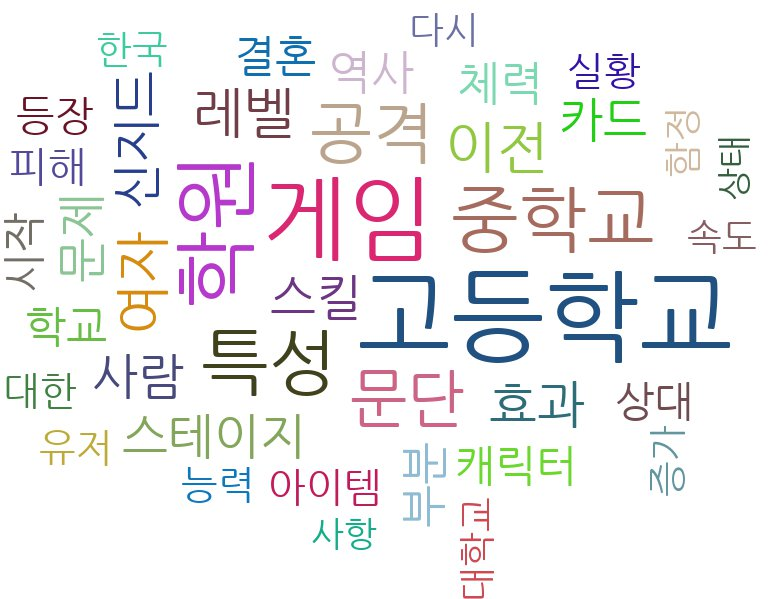

In [140]:
from IPython.display import Image
Image(filename = './chapter2/wordcloud.jpg')

In [141]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, './chapter2/title_wordcloud.jpg', size = (900, 600),
                            fontname = 'NanumGothic', rectangular = False)

Image(filename = './chapter2/title_wordcloud.jpg')

TypeError: startJVM() got an unexpected keyword argument 'convertStrings'

- 카테고리 키워드

In [142]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(category_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, './chapter2/category_wordcloud.jpg', size = (900, 600),
                            fontname = 'NanumGothic', rectangular = False)

Image(filename = './chapter2/category_wordcloud.jpg')

TypeError: startJVM() got an unexpected keyword argument 'convertStrings'